In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [61]:
# Data Generation
def generateDataset(m):         # m is the number of samples
  X = np.random.randn(m)*10     # Generating 100 sample data for X
  noise = np.random.randn(m)    # Generating some noises for each data to look like actual data
  y = 3 * X + 1 + 4 * noise      # Linear function to generate data
  return X,y


In [62]:
X,y = generateDataset(100)
print(X.shape, y.shape)

(100,) (100,)


In [63]:
def plotData(X,y,color="purple",title="Data"):
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.scatter(X,y,c = color)
  plt.show()

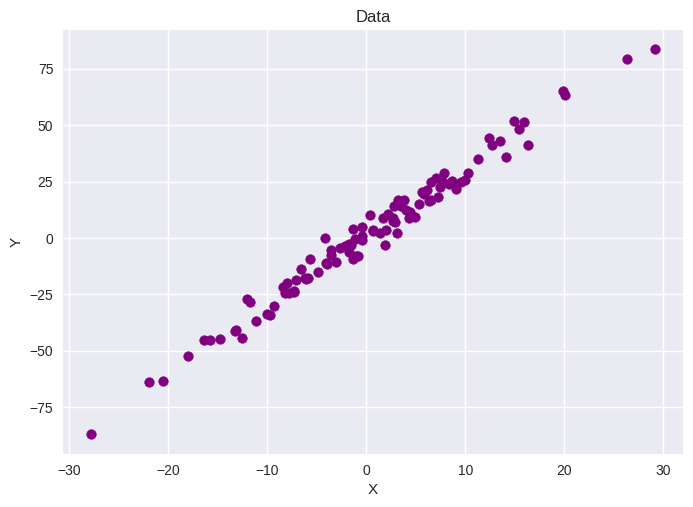

In [64]:
plotData(X,y)

In [65]:
def normalizeData(X):
  X = (X-X.mean()) / X.std()
  return X

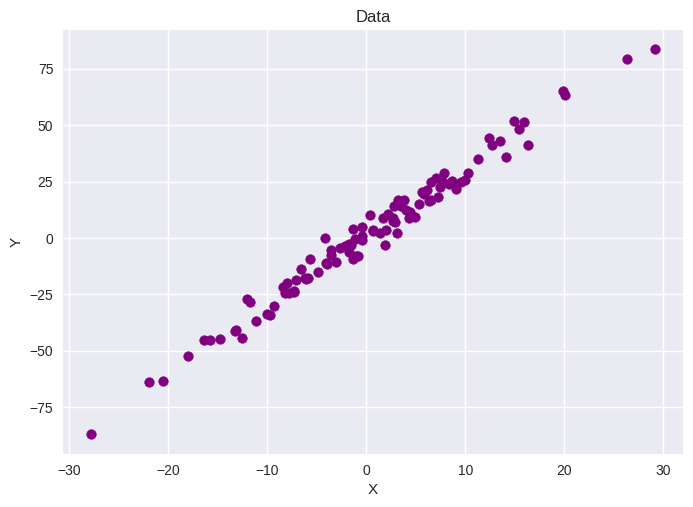

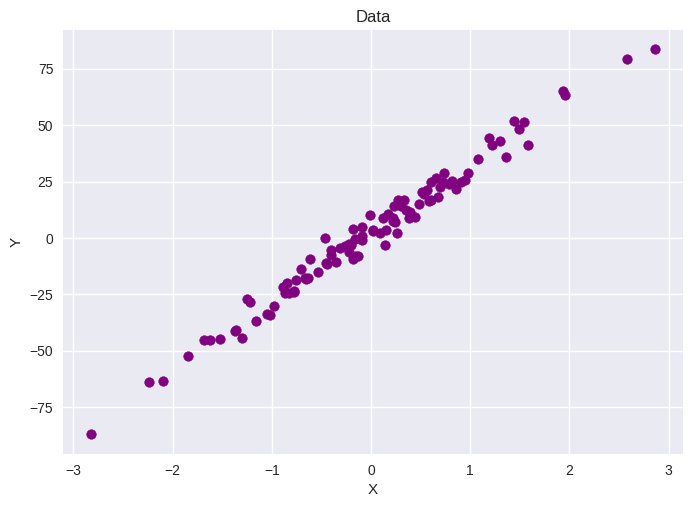

In [66]:
plotData(X,y)
X = normalizeData(X)
plotData(X,y)

In [67]:
def trainTestSplit(X,y, split = 0.8):
  m = X.shape[0]
  data = np.zeros((m,2))

  data[:,0] = X
  data[:,1] = y

  np.random.shuffle(data)

  split = int(m*split)

  XT = data[:split,0]
  yT = data[:split,1]

  Xt = data[split: ,0]
  yt = data[split: ,1]

  return XT, yT, Xt, yt

In [68]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [69]:
print(XT.shape, yt.shape)
print(Xt.shape, yt.shape)

(80,) (20,)
(20,) (20,)


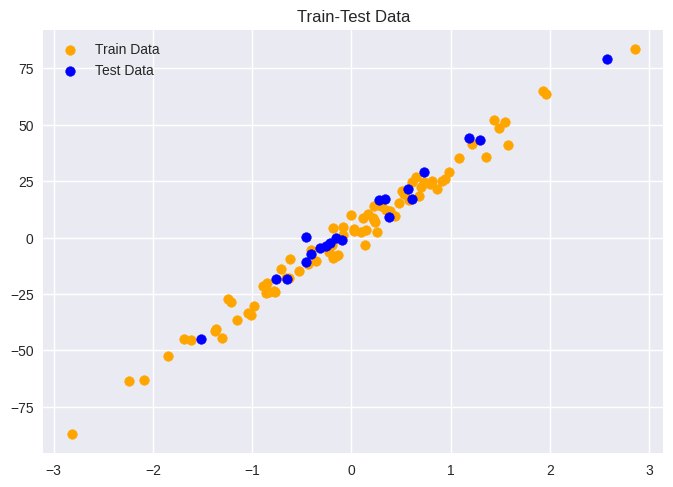

In [70]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color="blue",label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

**Modelling Section**

In [83]:
def hypothesis(X,theta):
  return theta[0] + theta[1] * X

def error(X,y,theta):
  m = X.shape[0]
  e = 0
  for i in range(m):
    y_i = hypothesis(X[i], theta)
    e = e + (y[i] - y_i)**2

  return e/(2*m)

def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i],theta) - y[i]
    grad[0] += (exp)
    grad[1] += (exp)*X[i]

  return grad/m

def train(X,y,learning_rate = 0.1, maxItrs = 100):
  theta = np.zeros((2,))
  error_list = []

  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] = theta[0] - learning_rate * grad[0]
    theta[1] = theta[1] - learning_rate * grad[1]

  plt.xlabel("Iteration Number")
  plt.ylabel("Loss")
  plt.plot(error_list)
  return theta

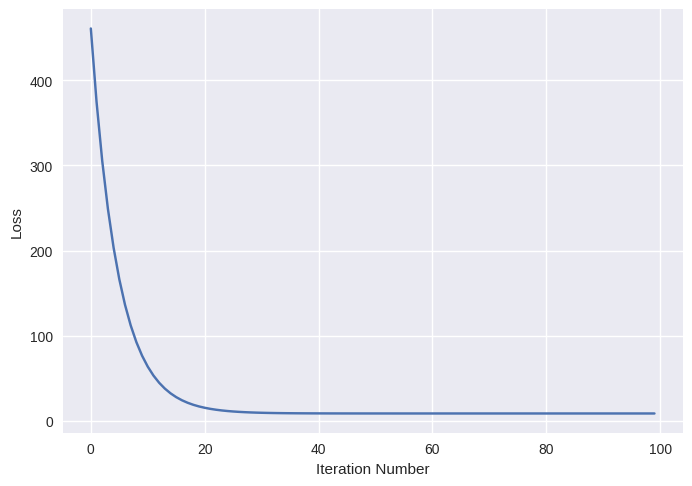

In [84]:
theta = train(X,y)

**Prediction**

In [85]:
def predict(X,theta):
  return hypothesis(X,theta)

In [87]:
yp = predict(Xt,theta)

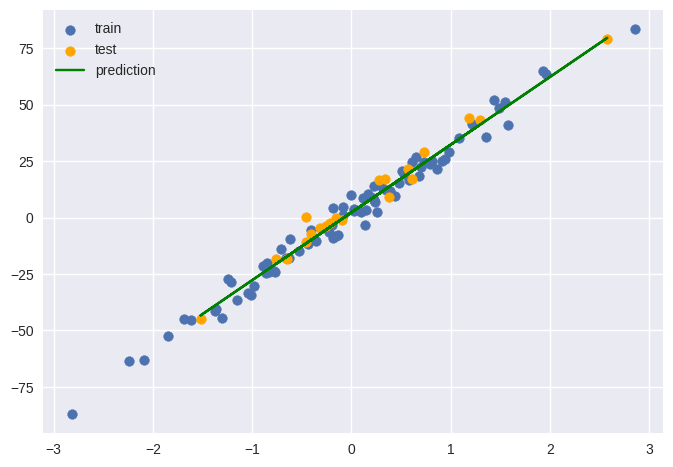

In [88]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color="orange",label="test")
plt.plot(Xt,yp,color="green",label="prediction")
plt.legend()
plt.show()